# Following case study has been done on data of "funding information of the Indian startups from January 2015 to August 2017."(CSV file)

Bangalore


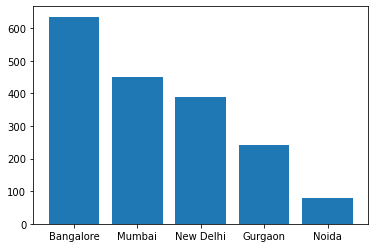

In [1]:
# Q1 find the location where startups has received funding maximum number of times. Plot the bar graph between location 
# and number of funding.locations - Bangalore, Mumbai, and NCR.(NCR include Gurgaon, Noida and New Delhi.)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('startup_funding.csv')
df['CityLocation'].dropna(inplace=True)
def separateCity(city):
    return city.split('/')[0].strip()
df['CityLocation']=df['CityLocation'].apply(separateCity)
df['CityLocation'].replace('bangalore','Bangalore',inplace=True)
df['CityLocation'].replace('Delhi',"New Delhi",inplace=True)
cl=['Bangalore','Mumbai','New Delhi','Gurgaon','Noida']
# a=df['CityLocation'].count()
a=df['CityLocation'].value_counts()
rc=dict(zip(a.index,a.values))
x=[]
for i in cl:
    x.append(rc[i])
print(cl[x.index(max(x))])
plt.bar(cl,x)
plt.show()

In [2]:
# Q2 Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). 
# In a startup, multiple investors might have invested. So consider each investor for that startup.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('startup_funding.csv')
df['InvestorsName'].dropna(inplace=True)
def cd(array):
    d={}
    for i in array:
        if "Undisclosed" in i:
            continue
        if ',' not in i:
            d[i]=d.get(i,0)+1
        else:
            s=i.strip().split(',')
            for j in s:
                d[j.strip()]=d.get(j.strip(),0)+1
    return d
d=cd(df['InvestorsName'])
x=pd.DataFrame(list(d.values()),list(d.keys()))
x=x.sort_values(by=[0],ascending=False)
for i in range(5):
    print(x.index[i])

Sequoia Capital
Accel Partners
Kalaari Capital
SAIF Partners
Indian Angel Network


In [3]:
# Q3
df=pd.read_csv('startup_funding.csv')
df.dropna(subset=['InvestorsName'],inplace=True)
df.reset_index(drop=True, inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
def cd(array,n):
    d={}
    k=0
    s=""
    for i in array:
        if "Undisclosed " in i:
            k+=1
            continue
        if ',' not in i and i!="":
            if i not in d:
                d[i.strip()]=[n[k]]
            elif n[k] not in d[i]:
                d[i.strip()]+=[n[k]]
        else:
            s=i.split(',')
            for j in s:
                if j=="":
                    continue
                j=j.strip()
                if j not in d:
                    d[j]=[n[k]]
                elif n[k] not in d[j]:
                    d[j]+=[n[k]]
        k+=1
    return d
d=cd(df['InvestorsName'],df['StartupName'])
d1={}
for k,v in d.items():
    d1[k]=len(d[k])
c=0
for k,v in sorted(d1.items(),reverse = True,key=lambda kv:(kv[1], kv[0])):
    print(k)
    c+=1
    if c>4:
        break

Sequoia Capital
Accel Partners
Kalaari Capital
Indian Angel Network
Blume Ventures


In [4]:
# Q 4
# Find the top 5 investors who have invested in a different number of startups
# and their investment type is Crowdfunding or Seed Funding.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv('startup_funding.csv')
df=data.copy()
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
df.dropna(subset=['InvestorsName'],inplace=True)
df.reset_index(drop=True, inplace=True)
def cd(array,n,m):
    d={}
    k=0
    s=""
    for i in array:
        if m[k]=="Private Equity" or m[k]=="Debt Funding":
            k+=1
            continue
        if "Undisclosed " in i:
            k+=1
            continue
        if ',' not in i and i!="":
            if i not in d:
                d[i.strip()]=[n[k]]
            elif n[k] not in d[i]:
                d[i.strip()]+=[n[k]]
        else:
            s=i.split(',')
            for j in s:
                if j=="":
                    continue
                j=j.strip()
                if j not in d:
                    d[j]=[n[k]]
                elif n[k] not in d[j]:
                    d[j]+=[n[k]]
        k+=1
    return d
d=cd(df['InvestorsName'],df['StartupName'],df['InvestmentType'])
d1={}
for k,v in d.items():
    d1[k]=len(d[k])
c=0
for k,v in sorted(d1.items(),reverse = True,key=lambda kv:(kv[1], kv[0])):
    print(k)
    c+=1
    if c>4:
        break

Indian Angel Network
Rajan Anandan
LetsVenture
Anupam Mittal
Kunal Shah


In [5]:
# Q5
data=pd.read_csv('startup_funding.csv')
df=data.copy()
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
df.dropna(subset=['InvestorsName'],inplace=True)
df.reset_index(drop=True, inplace=True)
def cd(array,n,m):
    d={}
    k=0
    s=""
    for i in array:
        if m[k]=="Private Equity" and "Undisclosed " not in i:
            if ',' not in i:
                if i not in d:
                    d[i.strip()]=[n[k]]
                elif n[k] not in d[i]:
                    d[i.strip()]+=[n[k]]
            else:
                s=i.split(',')
            for j in s:
                if j=="":
                    continue
                j=j.strip()
                if j not in d:
                    d[j]=[n[k]]
                elif n[k] not in d[j]:
                    d[j]+=[n[k]]
        k+=1
    return d
d=cd(df['InvestorsName'],df['StartupName'],df['InvestmentType'])
d1={}
for k,v in d.items():
    d1[k]=len(d[k])
c=0
for k,v in sorted(d1.items(),reverse = True,key=lambda kv:(kv[1], kv[0])):
    print(k)
    c+=1
    if c>4:
        break

Accel Partners
Sequoia Capital
Kalaari Capital
Blume Ventures
SAIF Partners
